# Part 1.2 Task Question 5

### This Script Contains the following:
#### 1. Data Libraries
#### 2. Data Import
#### 3.Profiling Variables (Question 5)
#### 4. Use Crosstabs to find data insights

### Import new dataframe that exludes low-activity customers

#### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Import data

In [2]:
# Create Path to create folder into a string
path = r'C:\Users\E054746\OneDrive - RSM\Data Analytics\CareerFoundry\Data Immersion\Achievement 4\11-2021 Instacart Basket Analysis'

In [3]:
# Import data that exludes low-activity customers
df_insta = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','Instacart_final_4_10.pkl'))

In [4]:
df_insta.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity Customer


In [5]:
df_insta.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,High-activity Customer
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,High-activity Customer
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,High-activity Customer
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,High-activity Customer
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,High-activity Customer


In [6]:
df_insta.shape

(30964564, 32)

### Question 5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

#### Create Age Group Brackets

In [7]:
# find minimum age

df_insta['age'].min()

18

In [8]:
# find maximum age

df_insta['age'].max()

81

In [9]:
# Create flags for age groups. 

age_group = []

for value in df_insta['age']:
    if value <= 20:
        age_group.append('18-20')
    elif (value > 20) and (value <= 30):
        age_group.append('21-30')
    elif (value > 30) and (value <= 40):
        age_group.append('31-40')
    elif (value > 40) and (value <= 50):
        age_group.append('41-50')
    elif (value > 50) and (value <= 60):
        age_group.append('51-60')
    elif (value > 60) and (value <= 70):
        age_group.append('61-70')
    elif (value > 70) and (value <= 80):
        age_group.append('71-80')
    elif (value > 80) and (value <= 82):
        age_group.append('80+')    
    else:
        result.append('No age category')

In [10]:
# Create new age_group column
df_insta['age_group'] = age_group

In [11]:
# Check age_group flag
df_insta['age_group'].value_counts().sort_index()

18-20    1454728
21-30    4849512
31-40    4844193
41-50    4868632
51-60    4834892
61-70    4779958
71-80    4846802
80+       485847
Name: age_group, dtype: int64

In [12]:
#Change dtype category
df_insta['age_group'] = df_insta['age_group'].astype('category')

#### Create a breakdown graph by age_groups

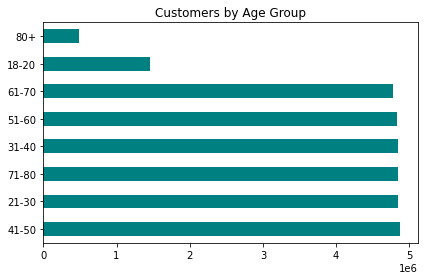

In [62]:
# A breakdown of customers by age groups
cust_by_age_group = df_insta['age_group'].value_counts().plot.barh(color='teal', title = 'Customers by Age Group')
plt.tight_layout()

In [63]:
# export chart in the form of an image file

cust_by_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_by_age_group.png'))

#### Create Income Brackets

In [13]:
# find the minimum income amount

df_insta['income'].min()

25903

In [14]:
# find the maximum income amount

df_insta['income'].max()

593901

In [15]:
# Create income brackets

income = []

for value in df_insta['income']:
    if(value > 25000) and (value <= 40000):
        income.append('25000-40000')
    elif (value > 40000) and (value <= 80000):
        income.append('40001-80000')
    elif (value > 80000) and (value <= 120000):
        income.append('80001-120000')
    elif (value > 120000) and (value <= 160000):
        income.append('120001-160000')
    elif (value > 160000) and (value <= 210000):
        income.append('160001-210000')
    elif (value > 210000) and (value <= 520000):
        income.append('210001-520000')
    elif (value > 520000):
        income.append('520000+')
    else: 
        income.append('other')

In [16]:
# Create new income_range flag column
df_insta['income_range'] = income

In [17]:
# Check income_range flag
df_insta['income_range'].value_counts().sort_index()

120001-160000     7051576
160001-210000     1888740
210001-520000      223781
25000-40000       1612025
40001-80000       9379895
520000+             15416
80001-120000     10793131
Name: income_range, dtype: int64

In [18]:
# Change dtype category
df_insta['income_range'] = df_insta['income_range'].astype('category')

In [19]:
# crosstab of income_range 

crosstab = pd.crosstab(df_insta['income'], df_insta['income_range'], dropna = False)

In [20]:
crosstab.to_clipboard()

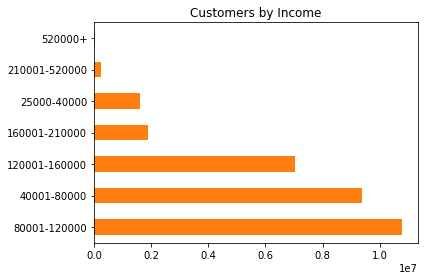

In [64]:
# A breakdown of customers by income range
cust_by_income = df_insta['income_range'].value_counts().plot.barh(color='tab:orange', title = 'Customers by Income')
plt.tight_layout()

In [65]:
# export chart in the form of an image file

cust_by_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_by_income.png'))

#### Create Parental Status

In [21]:
# check dependant numbers

df_insta['n_dependants'].value_counts().sort_index()

0    7739681
1    7719106
2    7733261
3    7772516
Name: n_dependants, dtype: int64

In [22]:
# create flag for non-parents(0 children)

df_insta.loc[(df_insta['n_dependants'] == 0), 'parental_status'] = 'Non-parent'

In [23]:
# create flag for parent (1+ children)

df_insta.loc[(df_insta['n_dependants'] >= 1), 'parental_status'] = 'Parent'

In [24]:
# check parental_status flag

df_insta['parental_status'].value_counts().sort_index()

Non-parent     7739681
Parent        23224883
Name: parental_status, dtype: int64

In [25]:
# head results  for n_dependants & parental_status

df_insta[['n_dependants', 'parental_status']].tail()

,n_dependants,parental_status
32404850,0,Non-parent
32404851,0,Non-parent
32404852,0,Non-parent
32404853,0,Non-parent
32404854,0,Non-parent


In [26]:
# Change dtype category
df_insta['parental_status'] = df_insta['parental_status'].astype('category')

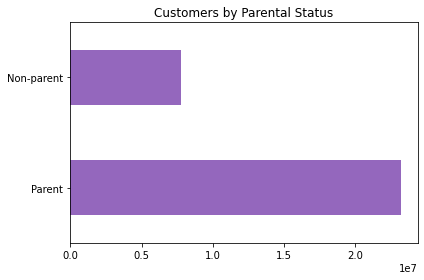

In [66]:
# A breakdown of parental_status 
cust_by_parent = df_insta['parental_status'].value_counts().plot.barh(color='tab:purple', title = 'Customers by Parental Status')
plt.tight_layout()

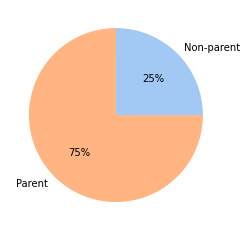

In [74]:
#define data
data = [7739681, 23224883]
labels = ['Non-parent', 'Parent']


#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [75]:
# export chart in the form of an image file

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_by_parental_stat.png'))

<Figure size 432x288 with 0 Axes>

#### Create a column to name the days of the week

In [27]:
# Create crosstab to confirm day 0 is Saturday and 1 is Sunday
max_order_day_of_week = pd.crosstab(df_insta['orders_day_of_week'],df_insta['max_order'],dropna = False)

In [28]:
max_order_day_of_week

max_order,5,6,7,8,9,10,11,12,13,14,...,90,91,92,93,94,95,96,97,98,99
orders_day_of_week,,,,,,,,,,,,,,,,,,,,,
0,164285,168111,160214,169723,166206,156340,156589,152241,146098,150063,...,7196,8375,6489,7044,8090,8665,5909,7063,6306,156049
1,133631,139181,139376,139873,135840,131001,133791,125938,124042,124171,...,10509,11158,10611,8026,8779,10581,7092,7416,7844,205445
2,103681,104107,105790,103486,104500,103724,96372,95564,97119,96337,...,6386,7958,8667,7360,8076,8171,5572,7029,6691,173784
3,91485,94693,94838,94569,96004,88829,91180,85619,87486,86980,...,6357,8289,7463,7149,7368,8251,5869,6465,6513,173059
4,87166,89497,90071,91466,90734,86997,84887,83442,84305,81817,...,5883,8240,8146,6985,6643,8378,5794,6229,6368,169422
5,96629,99836,97985,99621,100585,93062,94361,92419,91135,88506,...,6520,8661,8278,7328,7559,8754,5702,5813,6100,173342
6,116263,115971,115705,113105,116344,113171,112399,109231,106174,106096,...,5477,6697,5473,6441,6085,7077,4515,4934,4765,120232


In [29]:
# Creating day of the week column by replacing 0-6 with the name of the day

df_insta.loc[df_insta['orders_day_of_week'] == 0, 'weekday'] = 'Saturday'
df_insta.loc[df_insta['orders_day_of_week'] == 1, 'weekday'] = 'Sunday'
df_insta.loc[df_insta['orders_day_of_week'] == 2, 'weekday'] = 'Monday'
df_insta.loc[df_insta['orders_day_of_week'] == 3, 'weekday'] = 'Tuesday'
df_insta.loc[df_insta['orders_day_of_week'] == 4, 'weekday'] = 'Wednesday'
df_insta.loc[df_insta['orders_day_of_week'] == 5, 'weekday'] = 'Thursday'
df_insta.loc[df_insta['orders_day_of_week'] == 6, 'weekday'] = 'Friday'

In [30]:
# Check order totals for weekdays 
df_insta['weekday'].value_counts().sort_index()

Friday       4291304
Monday       4024706
Saturday     5908610
Sunday       5411686
Thursday     4033729
Tuesday      3669535
Wednesday    3624994
Name: weekday, dtype: int64

In [31]:
# Change dtype category to optmize memory size
df_insta['weekday'] = df_insta['weekday'].astype('category')

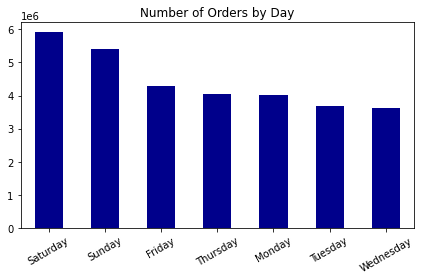

In [132]:
# Create a chart by orders day of the week
orders_dow = df_insta['weekday'].value_counts().plot.bar(color = ['darkblue'], title= 'Number of Orders by Day')
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [78]:
# export chart in the form of an image file

orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow.png'))

#### Create a column to name the department id

In [32]:
# check department_id numbers

df_insta['department_id'].value_counts().sort_index()

1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

In [33]:
# Creating department_name column by replacing department_id with dept names

df_insta.loc[df_insta['department_id'] == 1, 'dept_name'] = 'frozen'
df_insta.loc[df_insta['department_id'] == 2,'dept_name'] = 'other'
df_insta.loc[df_insta['department_id'] == 3,'dept_name'] = 'bakery'
df_insta.loc[df_insta['department_id'] == 4,'dept_name'] = 'produce'
df_insta.loc[df_insta['department_id'] == 5,'dept_name'] = 'alcohol'
df_insta.loc[df_insta['department_id'] == 6,'dept_name'] = 'international'
df_insta.loc[df_insta['department_id'] == 7,'dept_name'] = 'beverages'
df_insta.loc[df_insta['department_id'] == 8,'dept_name'] = 'pets'
df_insta.loc[df_insta['department_id'] == 9,'dept_name'] = 'dry goods pasta'
df_insta.loc[df_insta['department_id'] == 10,'dept_name'] = 'bulk'
df_insta.loc[df_insta['department_id'] == 11,'dept_name'] = 'personal care'
df_insta.loc[df_insta['department_id'] == 12,'dept_name'] = 'meat seafood'
df_insta.loc[df_insta['department_id'] == 13,'dept_name'] = 'pantry'
df_insta.loc[df_insta['department_id'] == 14,'dept_name'] = 'breakfast'
df_insta.loc[df_insta['department_id'] == 15,'dept_name'] = 'canned goods'
df_insta.loc[df_insta['department_id'] == 16,'dept_name'] = 'dairy eggs'
df_insta.loc[df_insta['department_id'] == 17,'dept_name'] = 'household'
df_insta.loc[df_insta['department_id'] == 18,'dept_name'] = 'babies'
df_insta.loc[df_insta['department_id'] == 19,'dept_name'] = 'snacks'
df_insta.loc[df_insta['department_id'] == 20,'dept_name'] = 'deli'
df_insta.loc[df_insta['department_id'] == 21,'dept_name'] = 'missing'

In [34]:
# Change dtype category to optmize memory size
df_insta['dept_name'] = df_insta['dept_name'].astype('category')

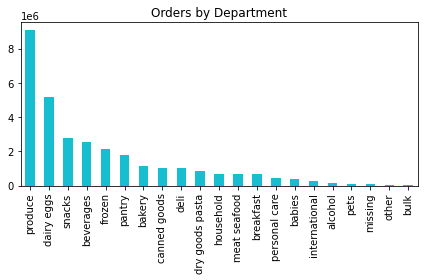

In [136]:
# Create a chart by orders by department
orders_dept = df_insta['dept_name'].value_counts().plot.bar(color='tab:cyan', title = 'Orders by Department')
plt.tight_layout()

In [82]:
# export chart in the form of an image file

orders_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dept.png'))

#### Review data type to ensure I am optimizing my memory

In [35]:
df_insta.dtypes

order_id                    object
user_id                     object
order_number                 int64
orders_day_of_week           int16
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int16
department_id                int64
prices                     float64
busiest_day               category
busiest_days              category
busiest_period_of_day     category
max_order                    int16
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float64
frequency_flag            category
gender                    category
state                     category
age                          int16
date_joined                 object
n_dependants                 int16
fam_status                category
income              

In [36]:
# Change dtypes to maximize memory size
df_insta['department_id'] = df_insta['department_id'].astype('int16')

### Data Insights for Marketing Strategy

In [37]:
# crosstab of dept_name & prod_name variables

xtab_dept_prod = pd.crosstab(df_insta['product_name'], df_insta['dept_name'], dropna = False)

In [61]:
xtab_dept_prod.to_clipboard()

Note that there are several items that are categorized as missing or other. There are 547 classified as other and 1247 items classified as missing

In [38]:
# crosstab of age_group & parental_status variables

xtab_age_parent = pd.crosstab(df_insta['age_group'], df_insta['parental_status'], dropna = False)

In [39]:
xtab_age_parent

parental_status,Non-parent,Parent
age_group,,
18-20,344965,1109763
21-30,1228407,3621105
31-40,1206887,3637306
41-50,1199385,3669247
51-60,1226936,3607956
61-70,1209315,3570643
71-80,1185579,3661223
80+,138207,347640


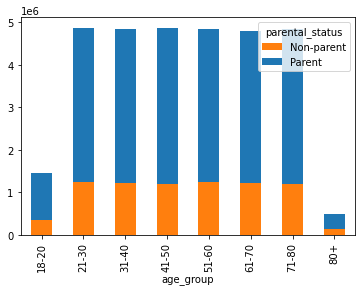

In [86]:
# parental status by age
xtab_age_parent = xtab_age_parent.plot.bar(stacked = True, color = ['tab:orange', 'tab:blue'])

In [87]:
# export chart in the form of an image file

xtab_age_parent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parentalstat_by_age.png'))

In [40]:
# crosstab of age_group & income_range variables

xtab_age_income = pd.crosstab(df_insta['age_group'], df_insta['income_range'], dropna = False)

In [41]:
xtab_age_income

income_range,120001-160000,160001-210000,210001-520000,25000-40000,40001-80000,520000+,80001-120000
age_group,,,,,,,
18-20,6179,7374,2721,100194,900856,0,437404
21-30,19497,21512,16664,345817,2967256,0,1478766
31-40,22274,20994,19848,334244,2987282,0,1459551
41-50,1716031,466711,54442,195355,619898,3993,1812202
51-60,1705802,448815,39341,212021,626631,3102,1799180
61-70,1689260,445691,44673,207613,596372,2293,1794056
71-80,1711781,441266,42219,194798,618973,4918,1832847
80+,180752,36377,3873,21983,62627,1110,179125


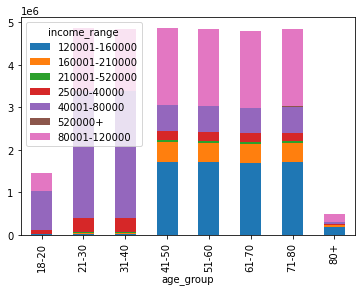

In [89]:
# graph showing age_range and income
xtab_age_income_graph = xtab_age_income.plot.bar(stacked = True)

In [90]:
# export chart in the form of an image file

xtab_age_income_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_by_age.png'))

In [42]:
# crosstab between region and fam_status
xtab_reg_fam_stat = pd.crosstab(df_insta['region'], df_insta['fam_status'], dropna = False)

In [43]:
xtab_reg_fam_stat

fam_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


In [44]:
# crosstab between region and loyalty status
xtab_reg_loyalty = pd.crosstab(df_insta['region'], df_insta['loyalty_flag'], dropna = False)

In [45]:
xtab_reg_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


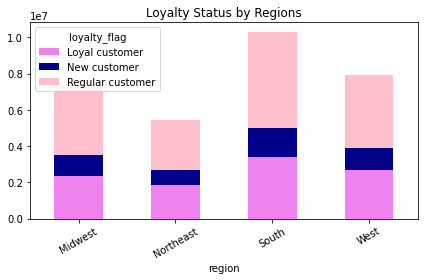

In [137]:
#Create a graph to compare customer loyalty by region
xtab_reg_loyalty_graph = xtab_reg_loyalty.plot.bar(stacked = True, title = 'Loyalty Status by Regions', color = ['violet', 'darkblue', 'pink'])
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [92]:
# export chart in the form of an image file

xtab_reg_loyalty_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_graph_by_region.png'))

In [100]:
# crosstab between age_group and loyalty status
xtab_age_loyalty = pd.crosstab(df_insta['age_group'], df_insta['loyalty_flag'], dropna = False)

In [101]:
xtab_age_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
18-20,466380,226439,761909
21-30,1592590,755155,2501767
31-40,1615189,732951,2496053
41-50,1636405,752099,2480128
51-60,1608845,757850,2468197
61-70,1595210,753268,2431480
71-80,1612043,749531,2485228
80+,157431,76402,252014


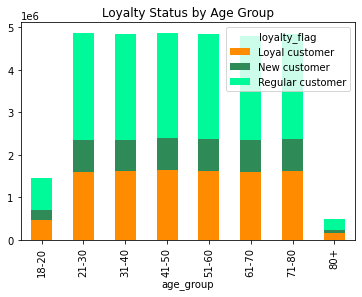

In [104]:
# graph comparing customer loyalty by age group 
xtab_age_loyalty_graph = xtab_age_loyalty.plot.bar(stacked = True,title = 'Loyalty Status by Age Group', color = ['darkorange','seagreen','mediumspringgreen'])

In [105]:
# export chart in the form of an image file

xtab_age_loyalty_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_graph_by_age.png'))

In [48]:
# crosstab between age_group and spending_flag
xtab_age_spending = pd.crosstab(df_insta['age_group'], df_insta['spending_flag'], dropna = False)

In [49]:
xtab_age_spending

spending_flag,High Spender,Low Spender
age_group,,
18-20,25714,1429014
21-30,89230,4760282
31-40,95400,4748793
41-50,104403,4764229
51-60,89206,4745686
61-70,99047,4680911
71-80,89932,4756870
80+,10439,475408


In [50]:
# crosstab between parental_status and frequency
xtab_parental_freq = pd.crosstab(df_insta['parental_status'], df_insta['frequency_flag'], dropna = False)

In [51]:
xtab_parental_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
parental_status,,,
Non-parent,5285137,716506,1738038
Parent,15919339,2178469,5127075


In [52]:
# crosstab between order_hour_of_day and spending_flag
xtab_orderhour_spending = pd.crosstab(df_insta['order_hour_of_day'], df_insta['spending_flag'], dropna = False)

In [53]:
xtab_orderhour_spending

spending_flag,High Spender,Low Spender
order_hour_of_day,,
0,3514,204528
1,2125,107496
2,1739,63952
3,1119,47677
4,1300,49463
5,1994,82424
6,6582,274431
7,17753,845460
8,30797,1628313


In [54]:
# crosstab between dept_name and income_range
xtab_dept_income = pd.crosstab(df_insta['dept_name'], df_insta['income_range'], dropna = False)

In [55]:
xtab_dept_income

income_range,120001-160000,160001-210000,210001-520000,25000-40000,40001-80000,520000+,80001-120000
dept_name,,,,,,,
alcohol,31291,9715,5212,8718,41390,491,47810
babies,99308,25659,1640,12547,118651,216,152371
bakery,259237,71525,11346,49409,331939,631,396741
beverages,555685,151297,21894,191662,803683,1371,846309
breakfast,146609,39658,5656,46066,209142,361,223358
bulk,7015,1846,24,2247,10872,3,11444
canned goods,240954,64581,7892,34946,296573,606,366522
dairy eggs,1195931,317352,38791,235552,1548564,2683,1838309
deli,228148,62124,6583,51355,302885,321,352418


In [57]:
# crosstab between dept_name and age_group
xtab_dept_age = pd.crosstab(df_insta['dept_name'], df_insta['age_group'], dropna = False)

In [58]:
xtab_dept_age

age_group,18-20,21-30,31-40,41-50,51-60,61-70,71-80,80+
dept_name,,,,,,,,
alcohol,8283,22152,23376,22677,22511,21597,21973,2058
babies,19831,64239,63594,67659,62050,63492,63029,6498
bakery,51629,175966,174903,176985,175328,172308,176150,17559
beverages,117392,401849,396168,404575,407230,396559,408118,40010
breakfast,32020,105615,104399,106368,104909,101673,104826,11040
bulk,1595,5365,5143,5426,4993,5213,5213,503
canned goods,47597,160647,157578,158032,158735,156506,157276,15703
dairy eggs,243669,812607,816071,818885,798006,795371,812161,80412
deli,46805,156948,157619,157389,156106,156166,157292,15509


In [108]:
xtab_dept_age.to_clipboard()

### Create a price range column

In [120]:
# create a flag for high-range product
df_insta.loc[(df_insta['prices'] > 15), 'price_range_loc'] = 'High-range product'

In [121]:
# create a flag for mid-range product
df_insta.loc[(df_insta['prices'] <= 15) & (df_insta['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [122]:
# create a flag for low-range product
df_insta.loc[(df_insta['prices'] <= 5), 'price_range_loc'] = 'Low-range product'

#### Create a Crosstab with loyalty status and price range

In [124]:
# create crosstab of loyalty_flag & price_range_loc variables

xtab_loyalty_price_range = pd.crosstab(df_insta['loyalty_flag'], df_insta['price_range_loc'], dropna = False)

In [126]:
xtab_loyalty_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,118606,3214690,6949467
New customer,65028,1501288,3236480
Regular customer,209442,4958862,10705824


In [127]:
xtab_loyalty_price_range.to_clipboard()

In [128]:
# create crosstab of frequency_flag & age_group

xtab_freq_age_range = pd.crosstab(df_insta['frequency_flag'], df_insta['age_group'], dropna = False)

In [129]:
xtab_freq_age_range

age_group,18-20,21-30,31-40,41-50,51-60,61-70,71-80,80+
frequency_flag,,,,,,,,
Frequent customer,997289,3320407,3311656,3342622,3290875,3285998,3328254,327375
Non-frequent customer,139424,448834,443099,462839,457850,449192,447420,46317
Regular customer,318015,1080271,1089438,1063171,1086167,1044768,1071128,112155


In [130]:
xtab_freq_age_range.to_clipboard()

### Question 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [110]:
# Find values that are over $100
df_insta.loc[df_insta['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,_merge,region,exclusion_flag,age_group,income_range,parental_status,weekday,dept_name
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,divorced/widowed,177864,both,Northeast,High-activity Customer,61-70,160001-210000,Non-parent,Monday,dairy eggs
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,divorced/widowed,177864,both,Northeast,High-activity Customer,61-70,160001-210000,Non-parent,Tuesday,dairy eggs
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,married,230074,both,West,High-activity Customer,51-60,210001-520000,Parent,Sunday,dairy eggs
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,married,233776,both,West,High-activity Customer,71-80,210001-520000,Parent,Monday,dairy eggs
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,married,182933,both,South,High-activity Customer,51-60,160001-210000,Parent,Monday,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303797,3138833,51346,1,6,4,NaN,33664,1,0,2 % Reduced Fat Milk,...,married,207497,both,Northeast,High-activity Customer,51-60,160001-210000,Parent,Friday,dairy eggs
32303798,1275440,51346,3,2,7,11.0,33664,5,1,2 % Reduced Fat Milk,...,married,207497,both,Northeast,High-activity Customer,51-60,160001-210000,Parent,Monday,dairy eggs
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,married,207497,both,Northeast,High-activity Customer,51-60,160001-210000,Parent,Sunday,dairy eggs
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,single,86490,both,Northeast,High-activity Customer,31-40,80001-120000,Non-parent,Wednesday,dairy eggs


In [111]:
# Mark items that are outliers (see above) as NaNs
df_insta.loc[df_insta['prices'] >100, 'prices'] = np.nan

In [112]:
# aggregating age + prices
df_insta.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
age_group                     
18-20      7.794831  1.0  25.0
21-30      7.777369  1.0  25.0
31-40      7.790979  1.0  25.0
41-50      7.799890  1.0  25.0
51-60      7.781205  1.0  25.0
61-70      7.799808  1.0  25.0
71-80      7.791797  1.0  25.0
80+        7.803464  1.0  25.0

In [113]:
# aggregating age + order number
df_insta.groupby('age_group').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                  mean min max
age_group                     
18-20        17.688017   1  99
21-30        17.746747   1  99
31-40        18.028120   1  99
41-50        17.849072   1  99
51-60        17.773613   1  99
61-70        17.842554   1  99
71-80        17.790306   1  99
80+          18.017180   1  99

In [114]:
# aggregating income range + prices
df_insta.groupby('income_range').agg({'prices' : ['min', 'mean', 'max']})

prices                
                 min      mean   max
income_range                        
120001-160000    1.0  7.958318  25.0
160001-210000    1.0  7.951699  25.0
210001-520000    1.0  7.777300  25.0
25000-40000      1.0  6.502895  25.0
40001-80000      1.0  7.662111  25.0
520000+          1.0  7.677012  25.0
80001-120000     1.0  7.957268  25.0

In [115]:
# income + order number
df_insta.groupby('income_range').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
income_range                      
120001-160000    17.820677   1  99
160001-210000    18.139597   1  99
210001-520000    20.120462   1  99
25000-40000      16.666917   1  99
40001-80000      17.896667   1  99
520000+          20.682797   1  99
80001-120000     17.858007   1  99

In [116]:
# aggregating parental status+ prices
df_insta.groupby('parental_status').agg({'prices' : ['min', 'mean', 'max']})

prices                
                   min      mean   max
parental_status                       
Non-parent         1.0  7.789550  25.0
Parent             1.0  7.790937  25.0

In [117]:
# aggregating parental status+ order
df_insta.groupby('parental_status').agg({'order_number' : ['min', 'mean', 'max']})

order_number               
                         min       mean max
parental_status                            
Non-parent                 1  17.957922  99
Parent                     1  17.792891  99

### Export Dataframe

In [118]:
# export df_insta to pkl 
 
df_insta.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Instacart_final2_4_10.pkl'))

In [119]:
df_insta.shape

(30964564, 37)

In [123]:
df_insta.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,_merge,region,exclusion_flag,age_group,income_range,parental_status,weekday,dept_name,price_range_loc
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,both,South,High-activity Customer,31-40,40001-80000,Parent,Monday,beverages,Mid-range product
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,both,South,High-activity Customer,31-40,40001-80000,Parent,Tuesday,beverages,Mid-range product
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,both,South,High-activity Customer,31-40,40001-80000,Parent,Tuesday,beverages,Mid-range product
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,both,South,High-activity Customer,31-40,40001-80000,Parent,Wednesday,beverages,Mid-range product
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,both,South,High-activity Customer,31-40,40001-80000,Parent,Wednesday,beverages,Mid-range product
